<h1>Exploratory Data Analysis (EDA)</h1>

<b>Data Description</b><br>
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  


<b>Objective</b><br>
The Objective is to analyze AMCAT test data to understand how candidates perform across different sections. Identify areas of strength and weakness and determine. How these scores related to job success. By exploring trends in candidate performance. We aim to uncover which test sections candidates excel in an which ones they struggle with


In [84]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)

# Reading the Dataset
df = pd.read_csv('data.xlsx - Sheet1.csv')

# Top 5 Values of Dataset
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [85]:
# Shape of Dataset
print("Shape of Dataset\n", df.shape)

Shape of Dataset
 (3998, 39)


In [86]:
# Info of Dataset
print("Info of Dataset\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [87]:
#description of the dataset
print("\nData Description:")
print(df.describe())


Data Description:
                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.

In [88]:
# Checking is there any Nan (Null) Values available
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [89]:
# Checking Column Details

df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [90]:
# Columns of a Dataset
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

<h1>Data Cleaning</h1>

In [91]:
    # Droping Unwanted columns
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='ID')
df = df.drop(columns='CollegeID')

    # Replacing Unwanted values OR Changing the details
df['DOJ'] = df['DOJ'].str.replace(' 0:00', '')
df['DOL'] = df['DOL'].replace('present', '12/31/15').str.replace(' 0:00', '')
df['DOB'] = df['DOB'].str.replace(' 0:00', '')
df['Gender'] = df['Gender'].replace({'f':'Female','m':'Male'})

df['10board'] = df['10board'].str.replace('0', 'Other')
df['12board'] = df['12board'].str.replace('0', 'Other')


#df.head(8)

In [92]:
# Replace '0' & '-1' with NaN
df['GraduationYear'] = df['GraduationYear'].replace({0: np.nan})
df['JobCity'] = df['JobCity'].replace({'-1': np.nan})

# Fill NaN values with the mode value
mode_grad_year = df['GraduationYear'].mode()[0]
mode_job_city = df['JobCity'].mode()[0]

df['GraduationYear'] = df['GraduationYear'].fillna(mode_grad_year)
df['JobCity'] = df['JobCity'].fillna(mode_job_city)

In [93]:
# Finding '-1' values

minus_one_values = df.isin([-1]).sum()

print("\nMinus One Values:")
print(minus_one_values[minus_one_values > 0])


Minus One Values:
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
dtype: int64


In [94]:
# Finding '-1' values in Percentage

minus_one_counts = df.isin([-1]).sum() / len(df) * 100
minus_one_counts_filtered = minus_one_counts[minus_one_counts > 0]
print(minus_one_counts_filtered)

Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
dtype: float64


In [95]:
    # Replcing the '-1' Values
df['Domain'] = df['Domain'].replace({-1:0})
df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1:0})
df['ComputerScience'] = df['ComputerScience'].replace({-1:0})
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1:0})

# df.head()

I'm suggesting to remove certain columns because they have over 90% of their values as '-1'. This means there's a lot of missing information in these columns, which could affect our analysis. By taking out these columns, we can make our dataset simpler and focus on the data that we have more of, making our project more accurate.


| Sr.No. | Column Name              | Null Score      |
|------|---------------------|------------|
| 1    | MechanicalEngg        | 94.122061 |
| 2    | ElectricalEngg        | 95.972986 |
| 3    | TelecomEngg           | 90.645323 |
| 4    | CivilEngg             | 98.949475 |   

In [96]:
# Dropping columns

df = df.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])

In [97]:
# Converting GPA to Percentage (Column : 'collegeGPA')

    # Filltering the indices where 'collegeGPA' is less than 10
filtered_indices = df[df['collegeGPA'] < 10].index
#print(filtered_indices)

    # conversion to percentage only
df.loc[filtered_indices, 'collegeGPA'] = df.loc[filtered_indices, 'collegeGPA'] * 10

    # List of specific indices (filtered_indices)
specific_indices = [7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308]

# Accessing specific indices with the column 'collegeGPA'
conv_percentage = df.loc[specific_indices, 'collegeGPA']

# Print the specific indices along with their 'collegeGPA' values
print(conv_percentage)

7       85.8
138     66.3
788     68.0
1419    68.5
1439    80.7
1767    75.6
2151    69.5
2229    81.3
2293    93.0
2662    88.8
2691    88.9
3308    64.5
Name: collegeGPA, dtype: float64


In [98]:
# Iterate through each column in the DataFrame

for column in df.select_dtypes(include='object').columns:

    df[column] = df[column].str.strip().str.title() # Removing spaces and ensuring consistent formatting

In [99]:
# Correcting the Dtype

    #int
df['Salary'] = df['Salary'].astype('int64')

    #datatime
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%m/%d/%y')
df['DOL'] = pd.to_datetime(df['DOL'], format='%m/%d/%y')
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'], format='%Y')

    # Category
        # List of object columns to convert to category dtype
object_columns = ['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']

        # Convert object columns to category dtype
df[object_columns] = df[object_columns].astype('category')



In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   category      
 4   JobCity                3998 non-null   category      
 5   Gender                 3998 non-null   category      
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   category      
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   category      
 12  CollegeTier            3998 non-null   int64         
 13  Deg

In [101]:
# Cleaned Dataset

df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,Senior Quality Engineer,Bangalore,Female,1990-02-19,84.3,"Board Ofsecondary Education,Ap",2007,95.8,"Board Of Intermediate Education,Ap",2,B.Tech/B.E.,Computer Engineering,78.00,1141,0,Andhra Pradesh,2011-01-01,515,585,525,0.635979,445,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,Assistant Manager,Indore,Male,1989-10-04,85.4,Cbse,2007,85.0,Cbse,2,B.Tech/B.E.,Electronics And Communication Engineering,70.06,5807,0,Madhya Pradesh,2012-01-01,695,610,780,0.960603,0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,Systems Engineer,Chennai,Female,1992-08-03,85.0,Cbse,2010,68.2,Cbse,2,B.Tech/B.E.,Information Technology,70.00,64,0,Uttar Pradesh,2014-01-01,615,545,370,0.450877,395,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,Senior Software Engineer,Gurgaon,Male,1989-12-05,85.6,Cbse,2007,83.6,Cbse,1,B.Tech/B.E.,Computer Engineering,74.64,6920,1,Delhi,2011-01-01,635,585,625,0.974396,615,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,Get,Manesar,Male,1991-02-27,78.0,Cbse,2008,76.8,Cbse,2,B.Tech/B.E.,Electronics And Communication Engineering,73.90,11368,0,Uttar Pradesh,2012-01-01,545,625,465,0.124502,0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


<h1>Univariate Analysis</h1>

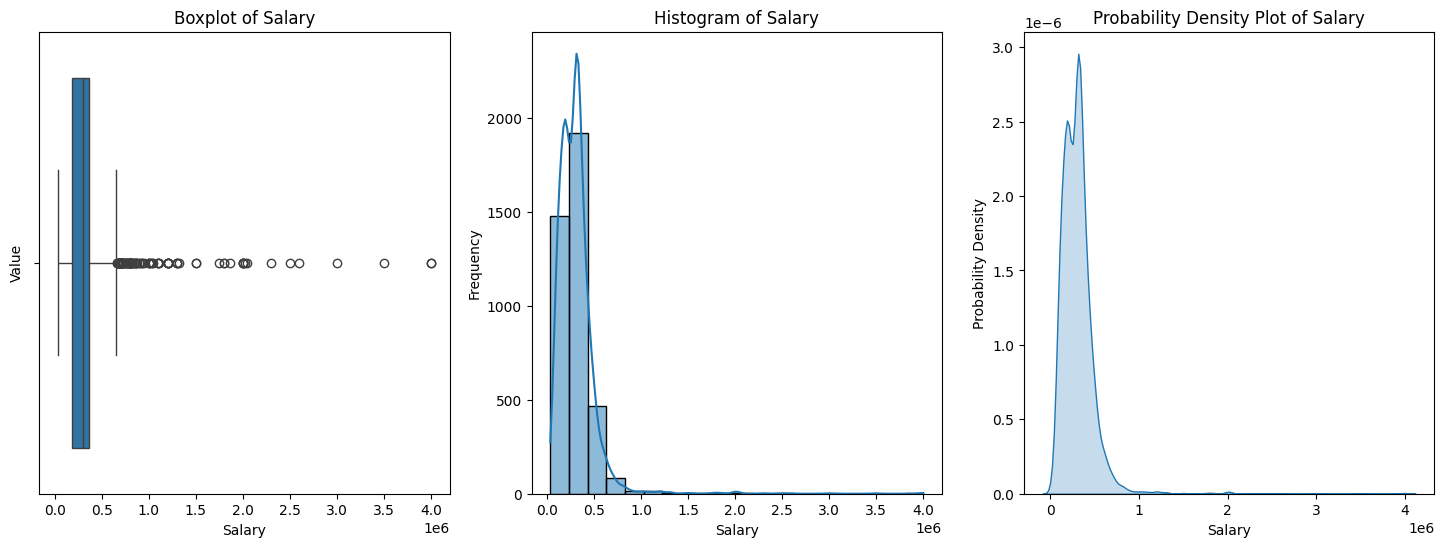

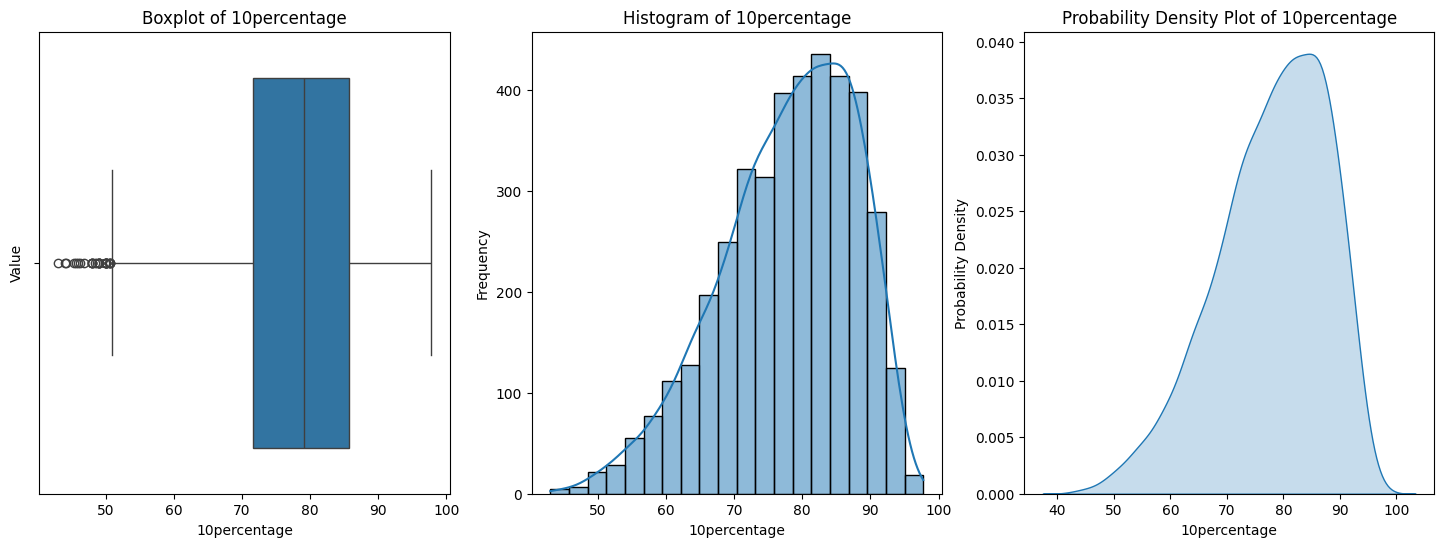

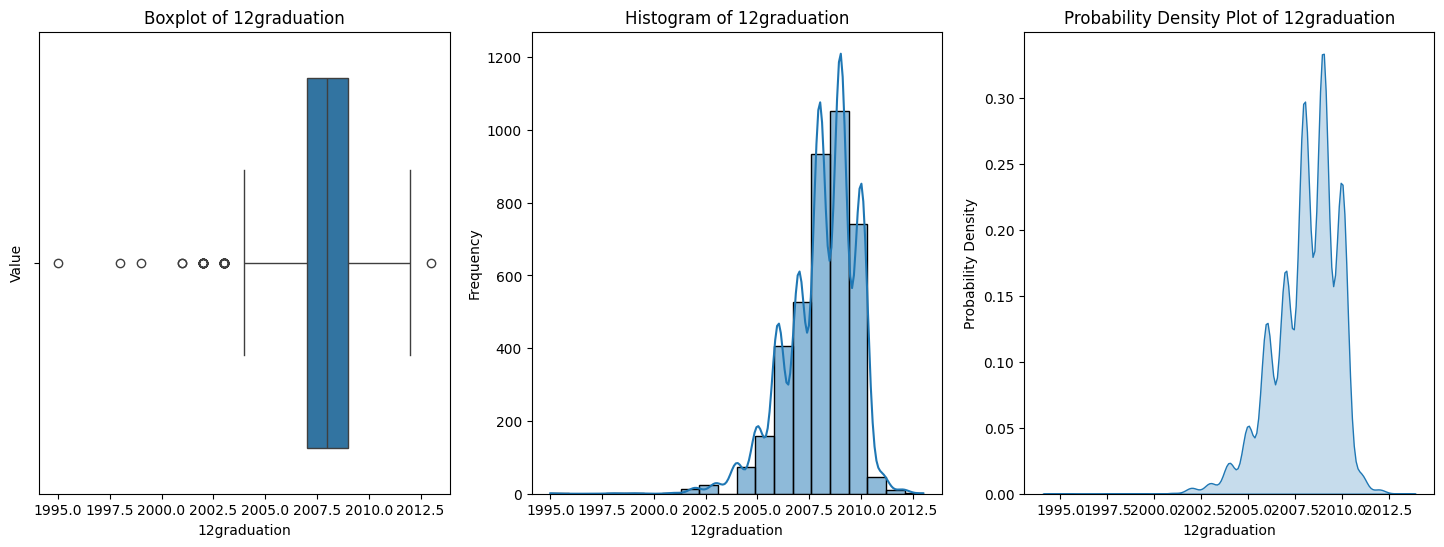

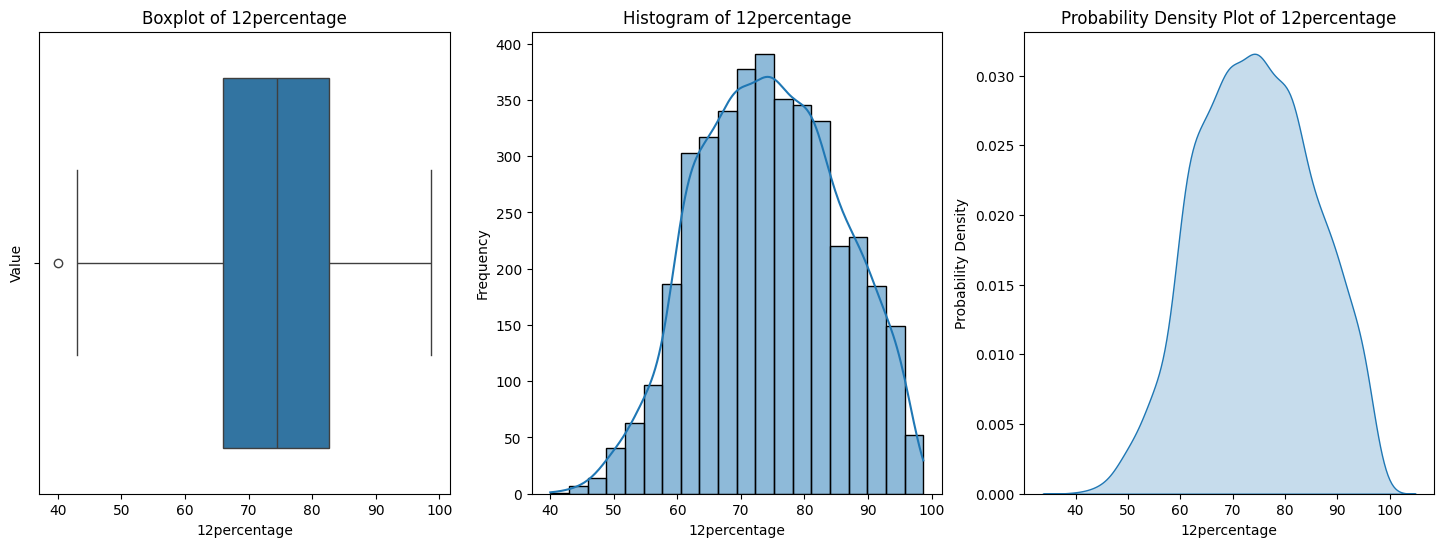

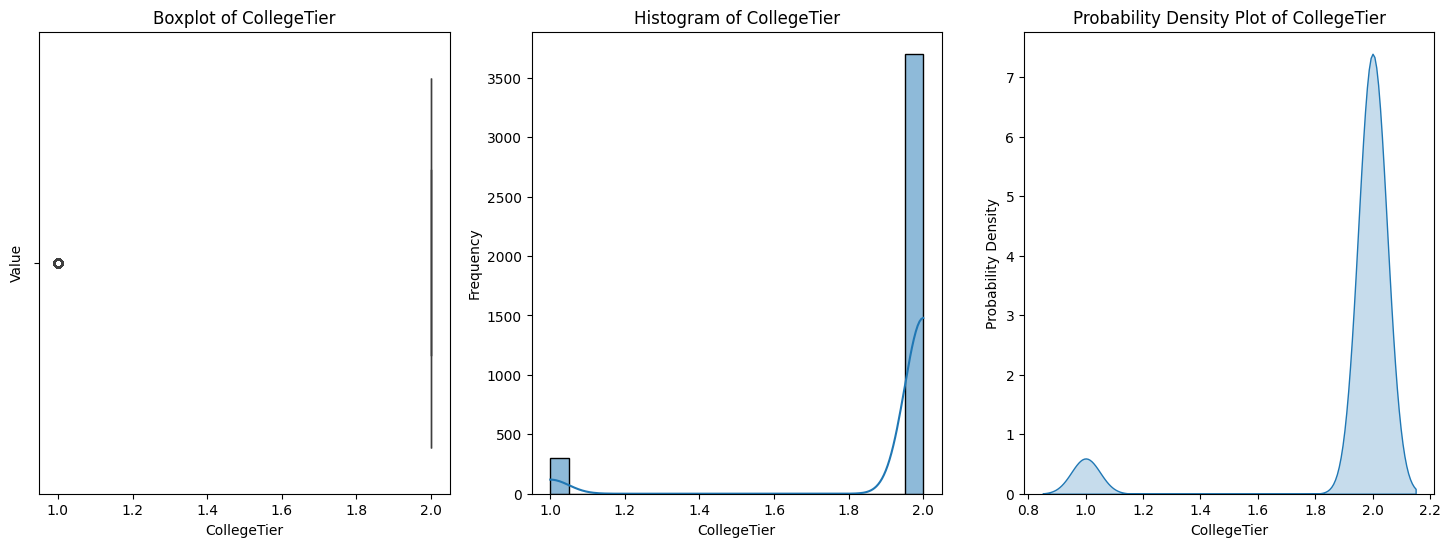

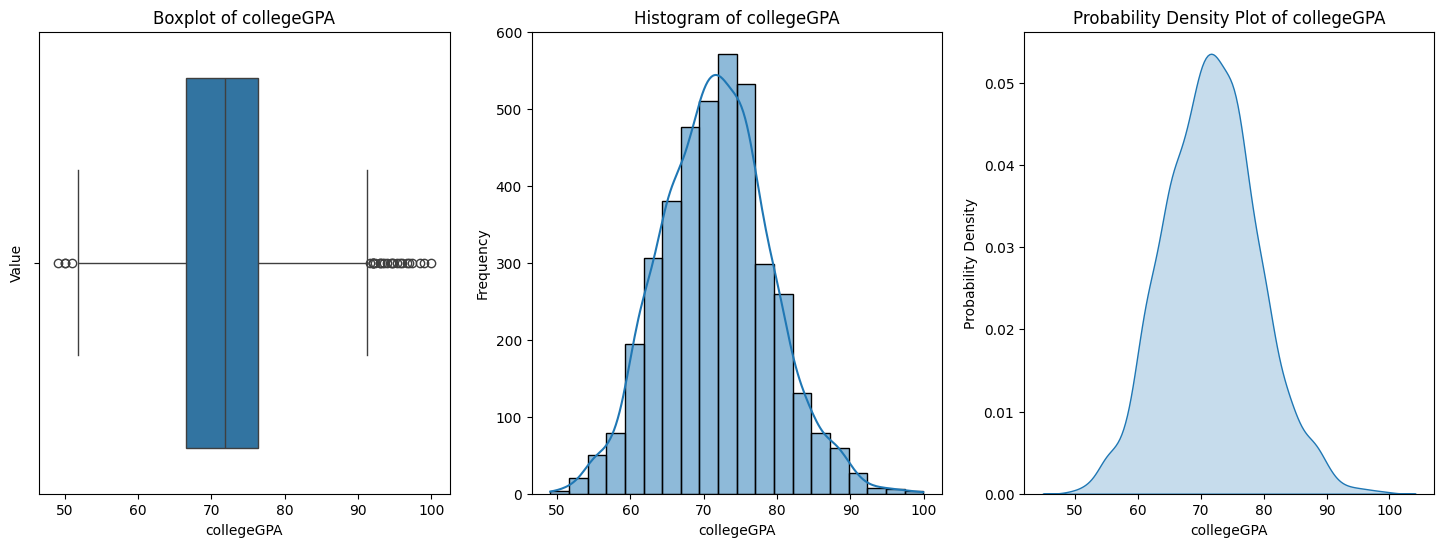

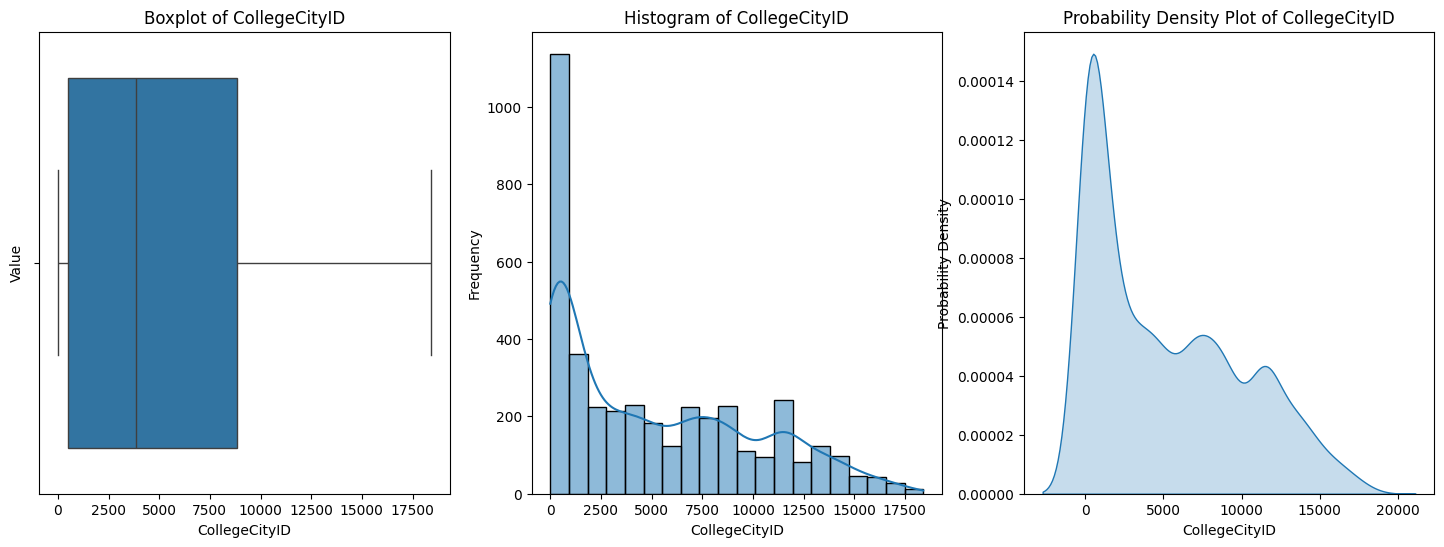

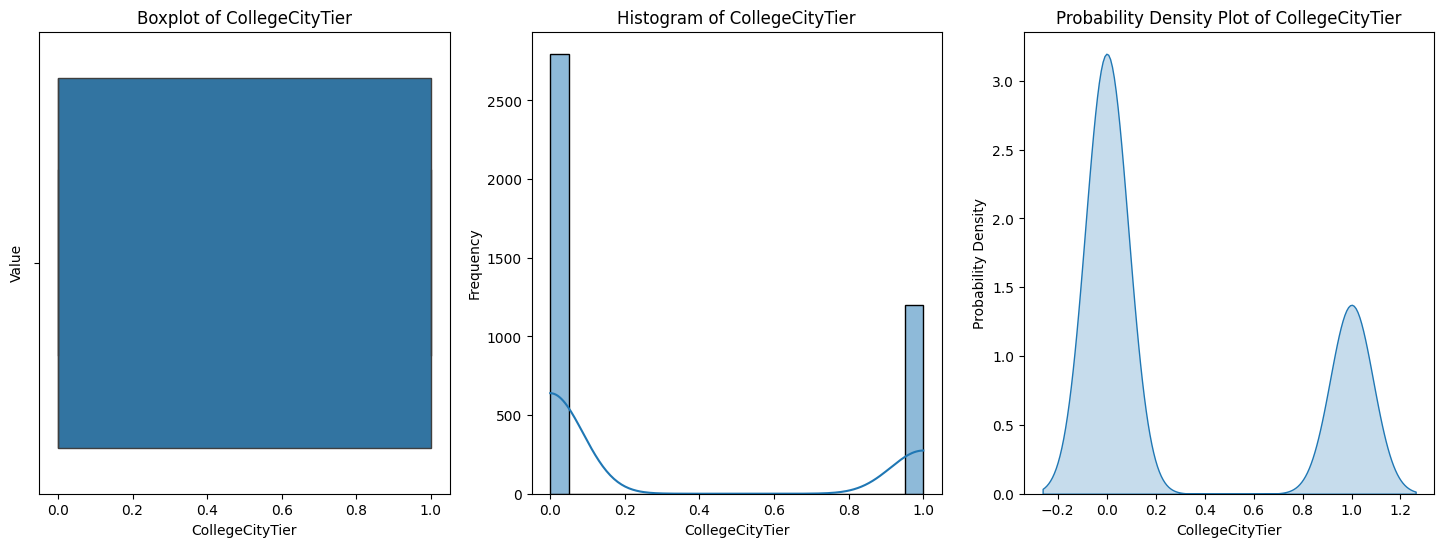

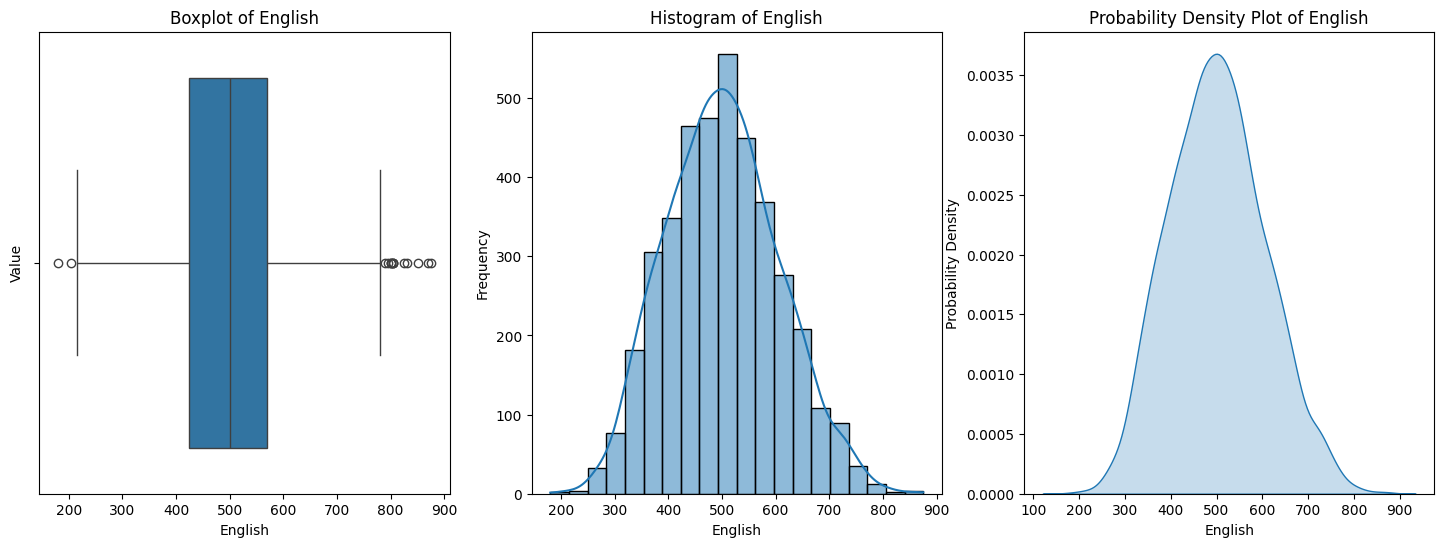

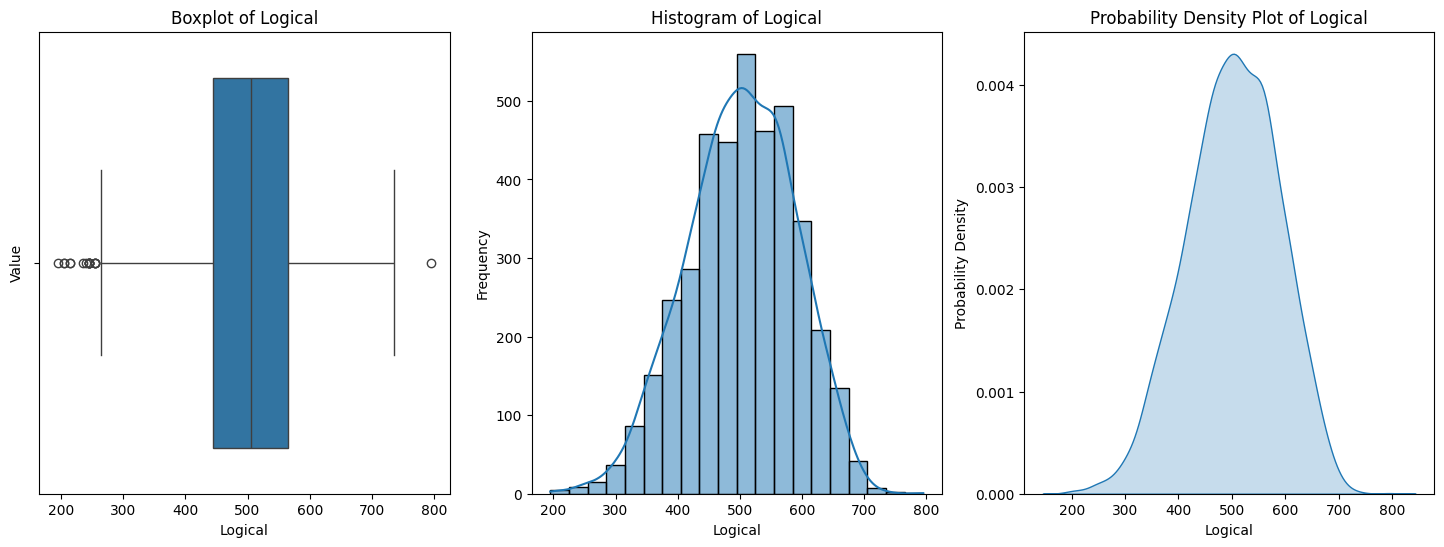

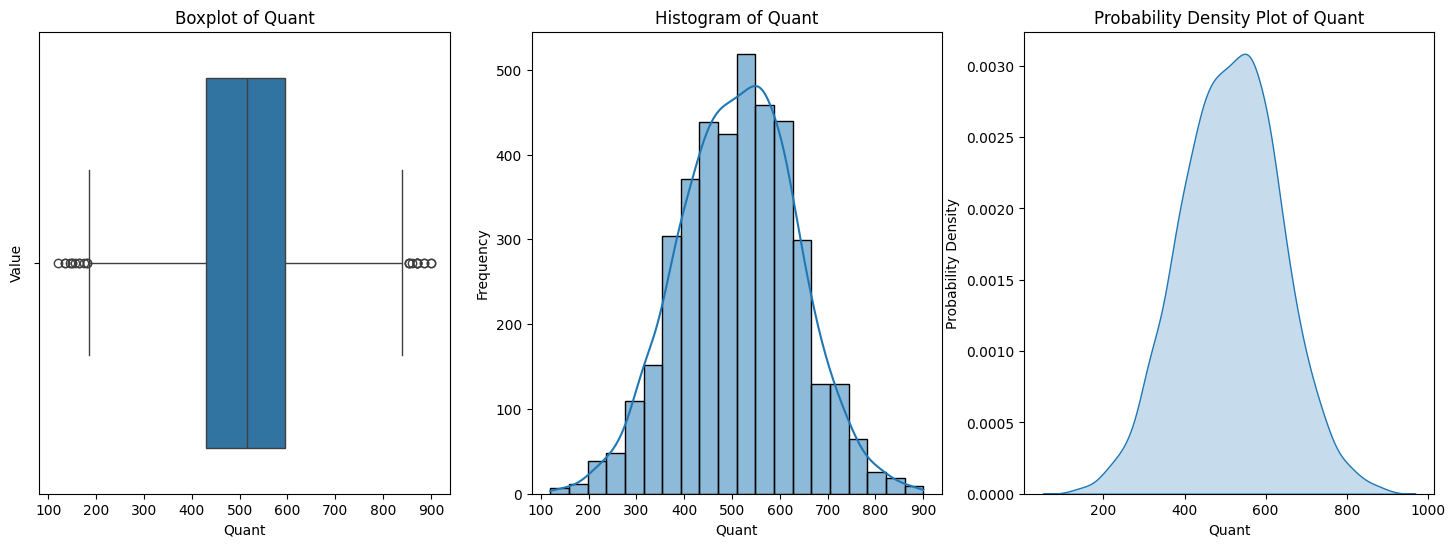

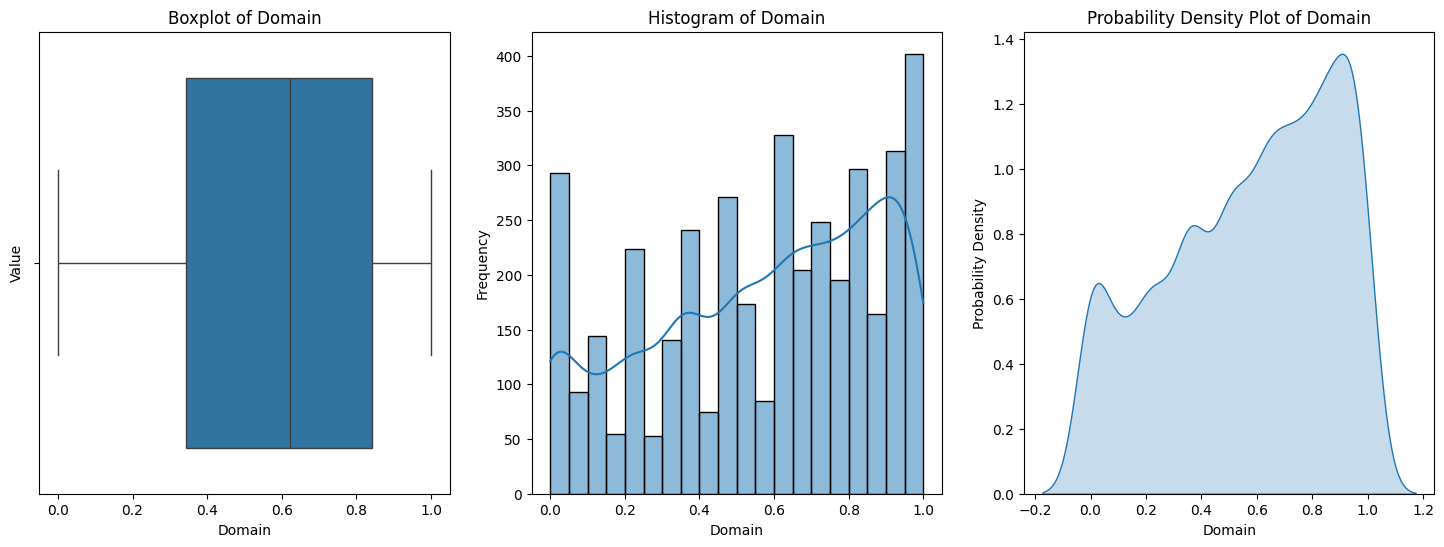

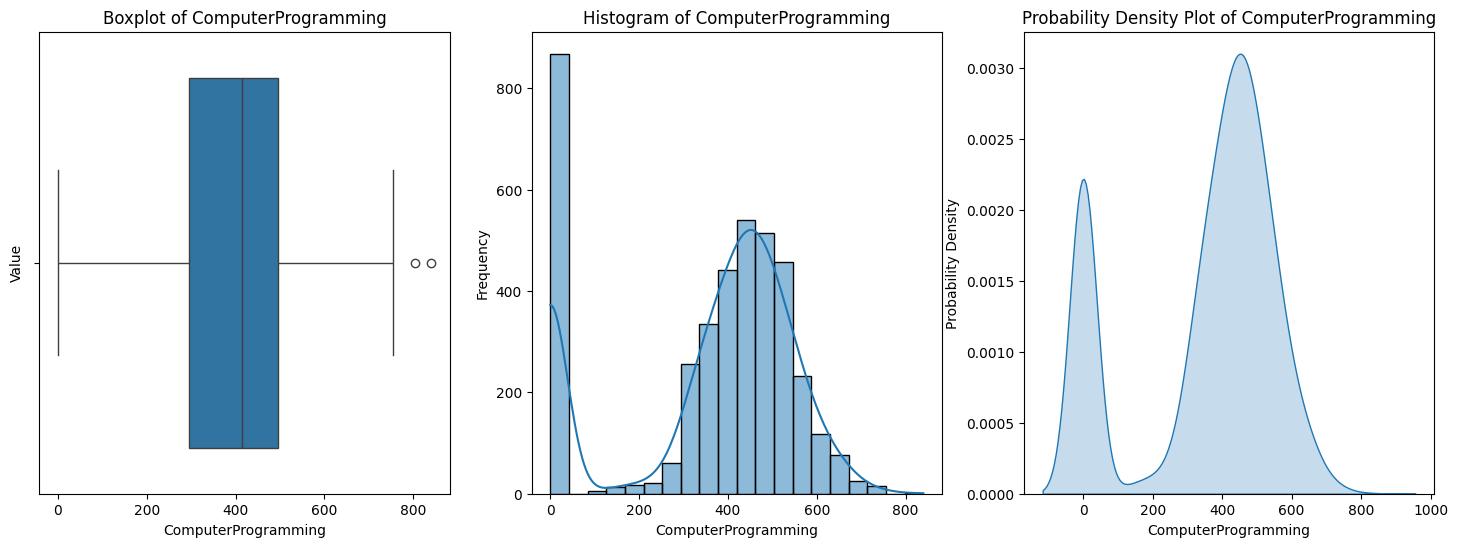

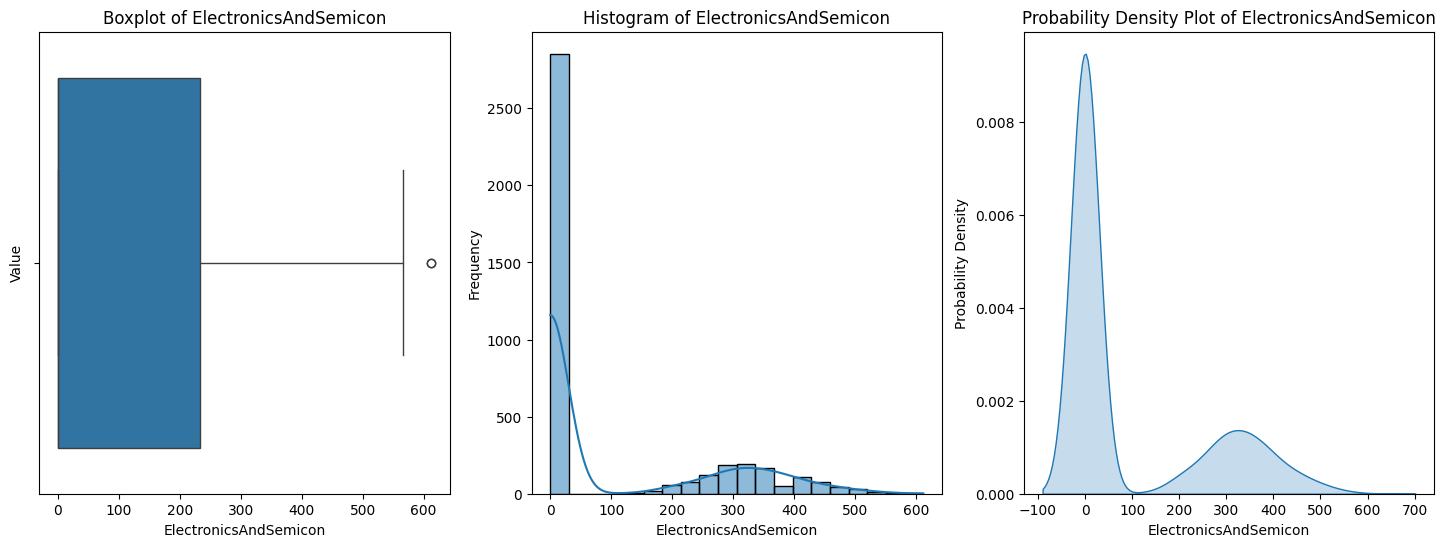

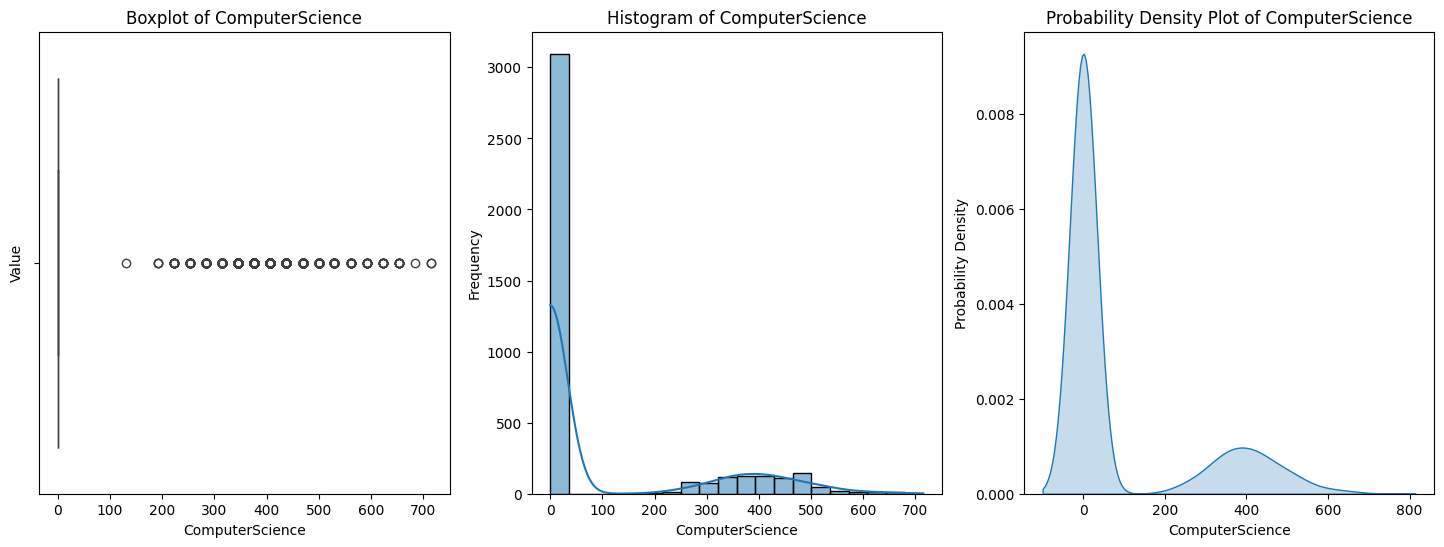

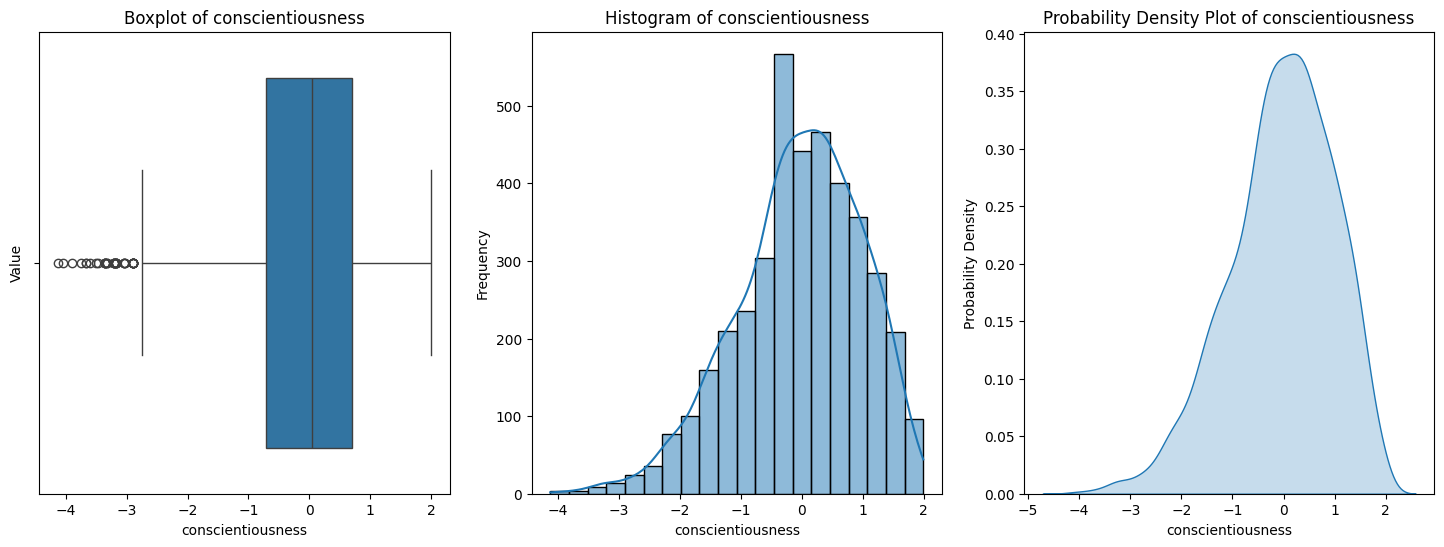

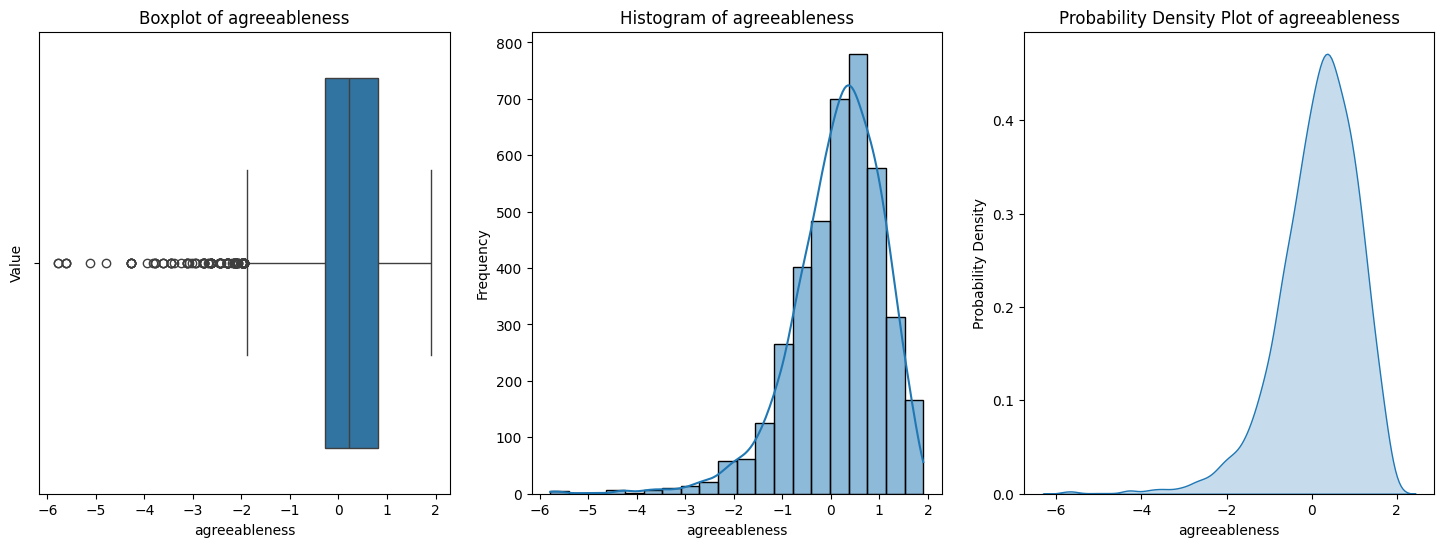

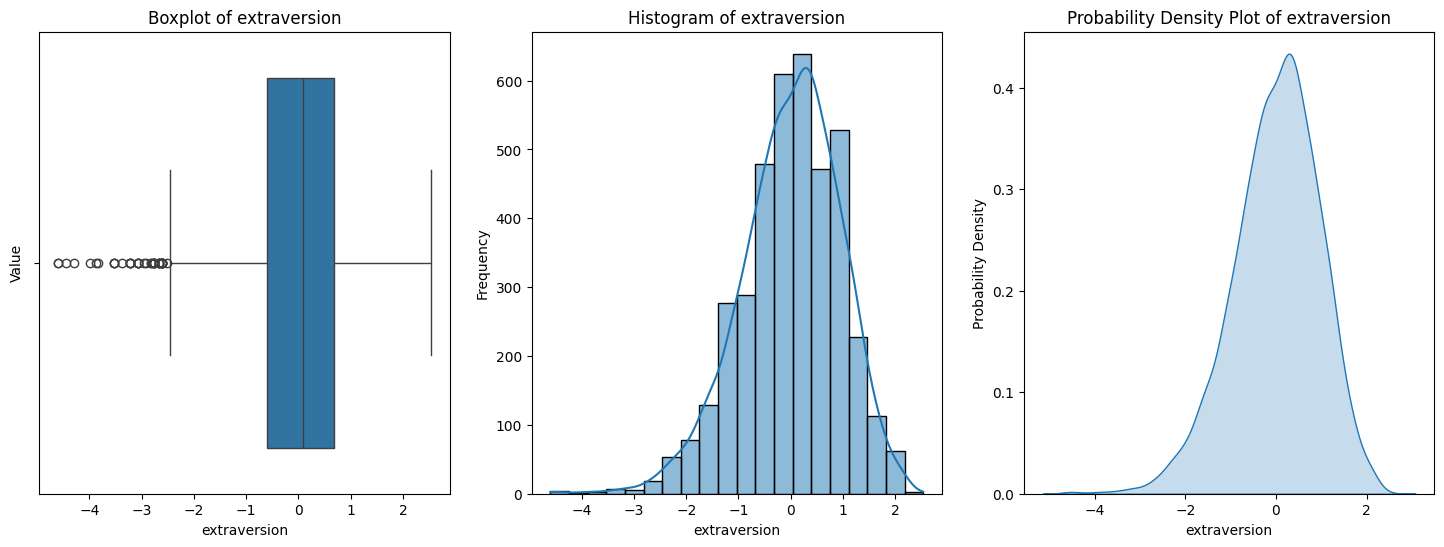

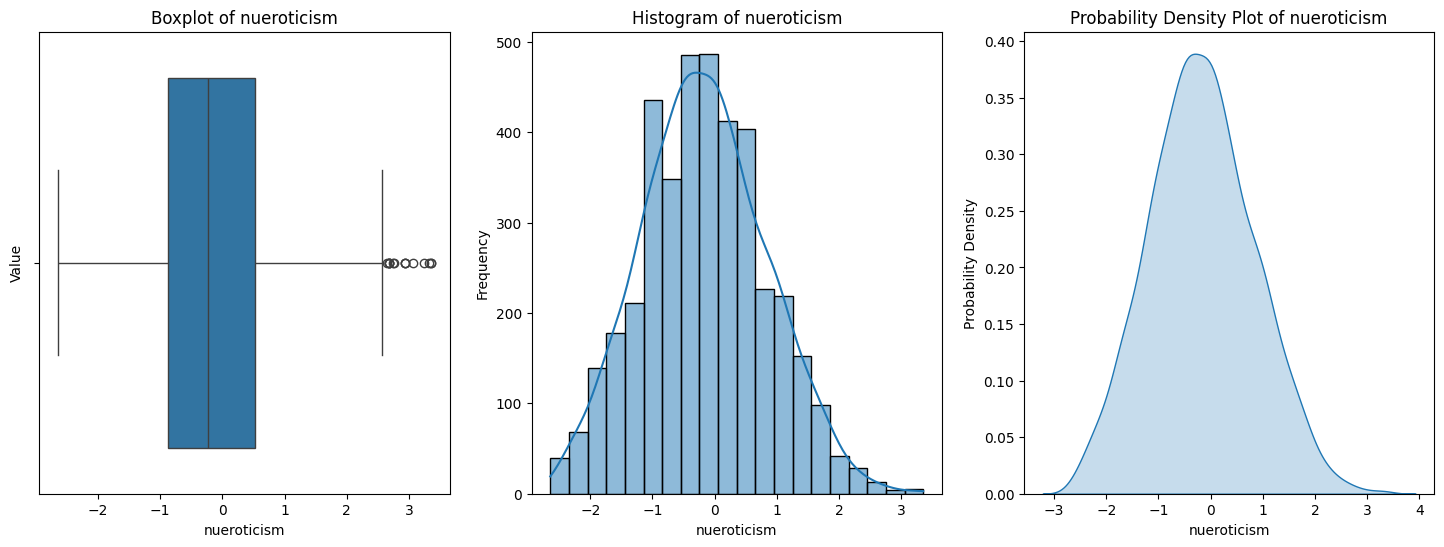

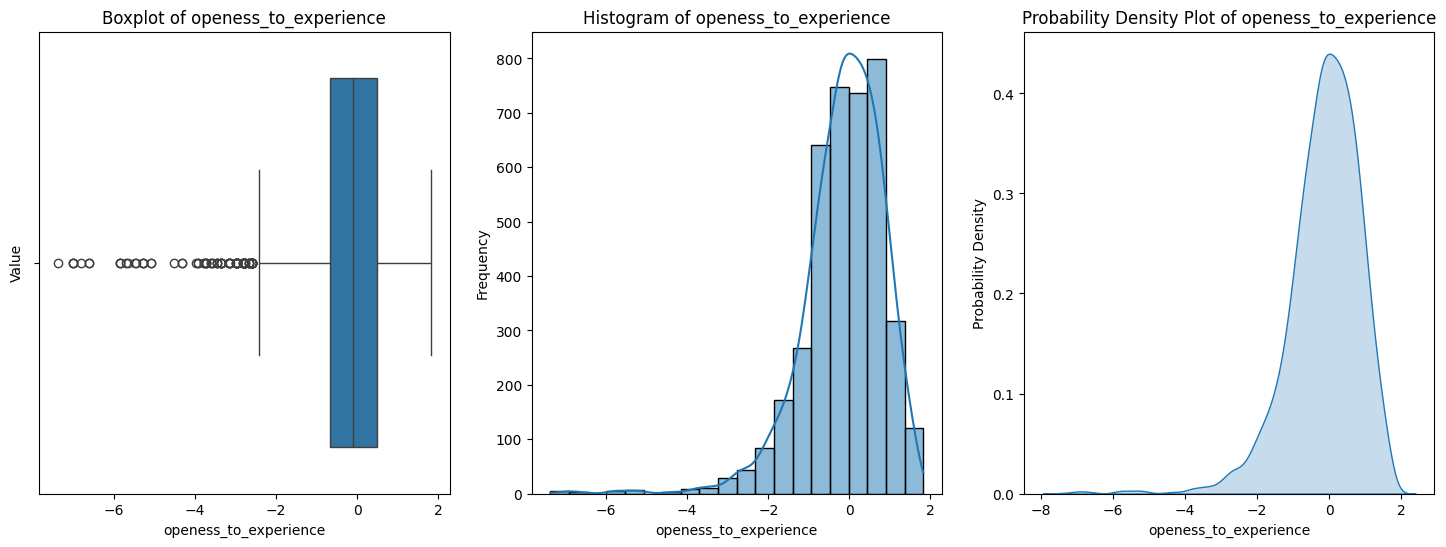

In [102]:
# Calculate basic statistics
basic_stats = df.describe()

# Visualize frequency distribution using histograms and probability distribution using kernel density plots
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Boxplot
    sns.boxplot(x=df[column], ax=ax1)
    ax1.set_title(f'Boxplot of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Value')

    # Histogram
    sns.histplot(df[column], kde=True, bins=20, ax=ax2)
    ax2.set_title(f'Histogram of {column}')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Frequency')

    # Probability Density Plot
    sns.kdeplot(df[column], fill=True, ax=ax3)
    ax3.set_title(f'Probability Density Plot of {column}')
    ax3.set_xlabel(column)
    ax3.set_ylabel('Probability Density')

    plt.show()

<b>categorical Variable/Column</b>

In [103]:
# Create a DataFrame for categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()  # Get list of categorical column names
categorical_df = df[categorical_columns]

# Create a DataFrame for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Get list of numerical column names
numerical_df = df[numerical_columns]

# Display information about the categorical DataFrame
print("Information about the Categorical DataFrame:")
print(categorical_df.info())

# Display information about the numerical DataFrame
print("\nInformation about the Numerical DataFrame:")
print(numerical_df.info())

Information about the Categorical DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Designation     3998 non-null   category
 1   JobCity         3998 non-null   category
 2   Gender          3998 non-null   category
 3   10board         3998 non-null   category
 4   12board         3998 non-null   category
 5   Degree          3998 non-null   category
 6   Specialization  3998 non-null   category
 7   CollegeState    3998 non-null   category
dtypes: category(8)
memory usage: 100.3 KB
None

Information about the Numerical DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   int64  
 1   10percentage           3998 n

In [104]:
unique_value_counts = {}

# Assuming categorical_columns is already defined
for col in categorical_columns:
    unique_value_counts[col] = df[col].nunique()

# Sorting the dictionary by values in descending order
sorted_unique_value_counts = dict(sorted(unique_value_counts.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted dictionary
for col, count in sorted_unique_value_counts.items():
    print(f"{col}: {count}")


Designation: 419
12board: 337
10board: 273
JobCity: 231
Specialization: 46
CollegeState: 26
Degree: 4
Gender: 2



When creating a plot to display the values found in columns such as <b>Designation, 12board, 10board, JobCity, Specialization, CollegeState</b>, it's better to use a bar chart. These columns have lots of unique values, so plotting all of them might make the chart too crowded and hard to understand. Instead, just show the most common <b>10</b> values to keep the chart clear and easy to read.

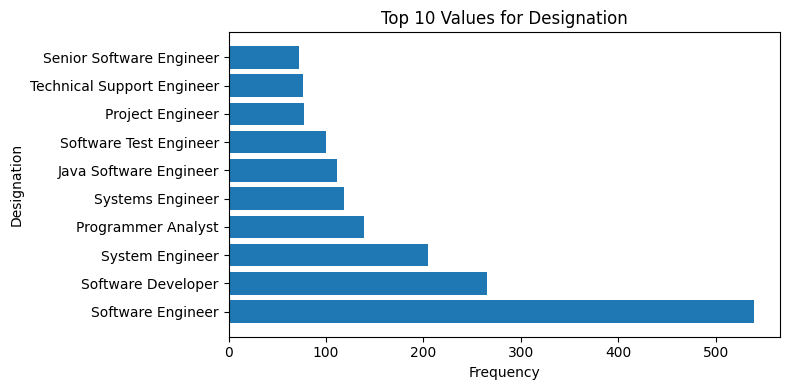

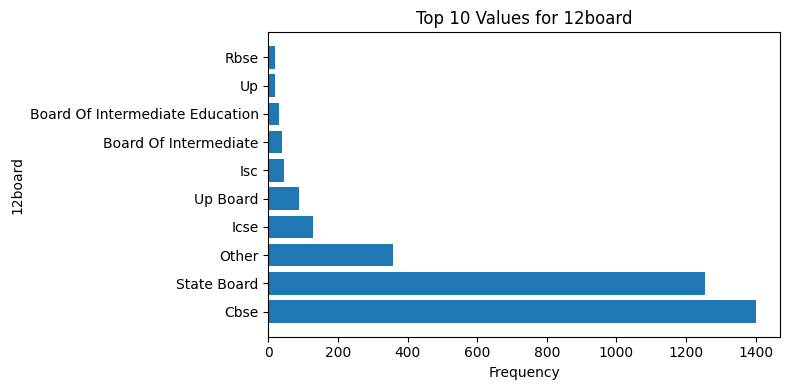

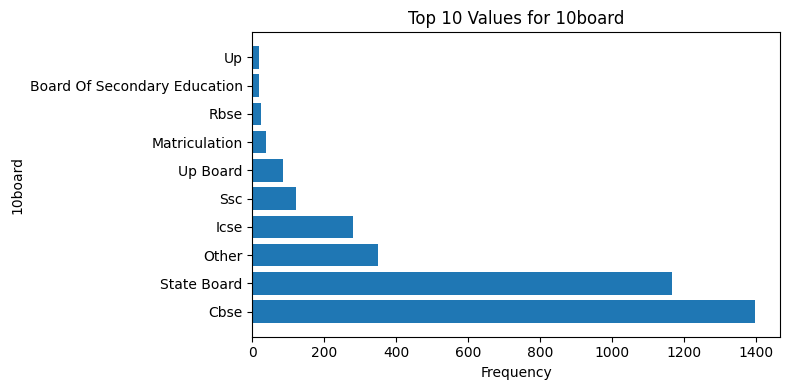

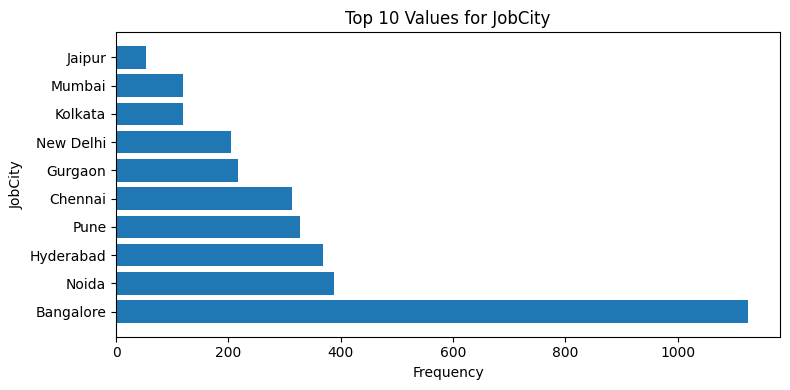

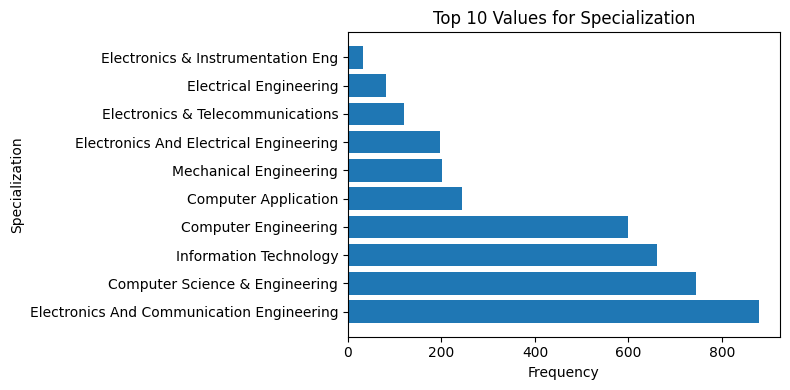

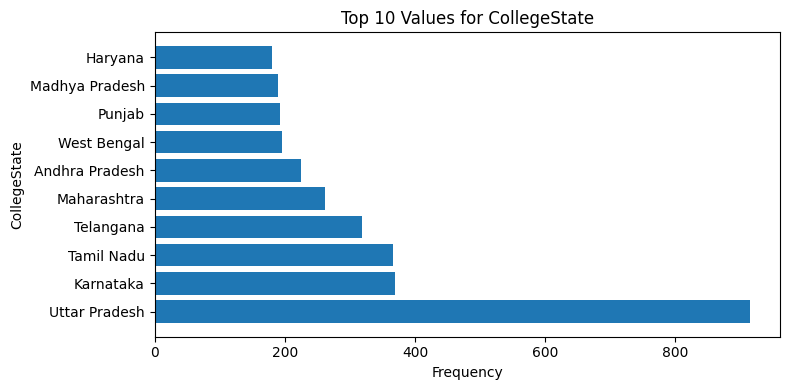

In [105]:
# Define the columns to analyze
columns_to_plot = ["Designation", "12board", "10board", "JobCity", "Specialization", "CollegeState"]

# Initialize an empty dictionary to store the top 10 values for each column
top_10_values = {}

# Loop through each column and find the top 10 values
for col in columns_to_plot:
    top_10_values[col] = df[col].value_counts().head(10)

# Plot the bar charts
for col, value_counts in top_10_values.items():
    plt.figure(figsize=(8, 4))
    plt.barh(value_counts.index, value_counts.values)
    plt.xlabel("Frequency")
    plt.ylabel(col)
    plt.title(f"Top 10 Values for {col}")
    plt.tight_layout()
    plt.show()

<h1>Bivariate Analysis</h1>

<b>To discover the relationships between numerical columns in the df DataFrame, you can use the following techniques:</b>

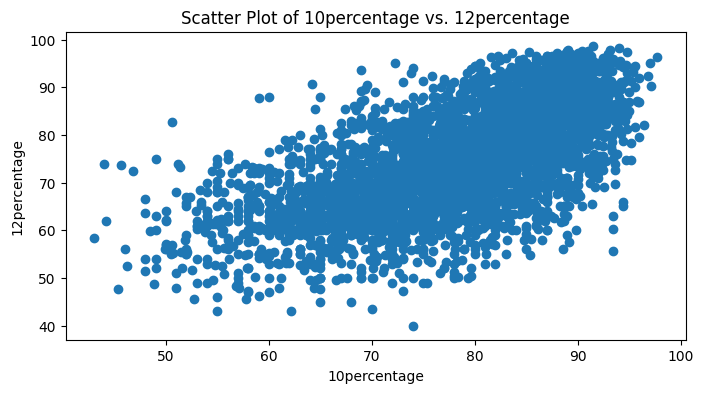

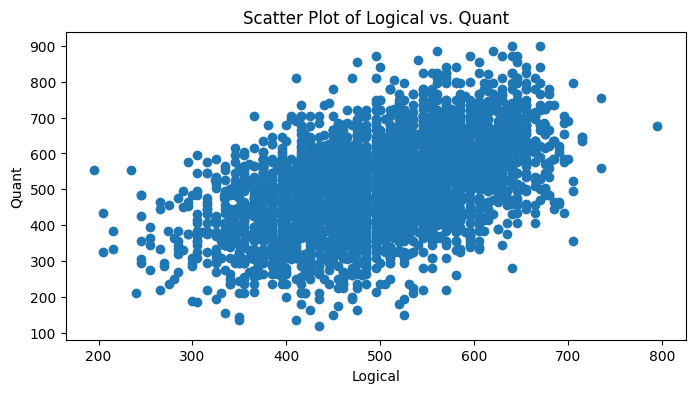

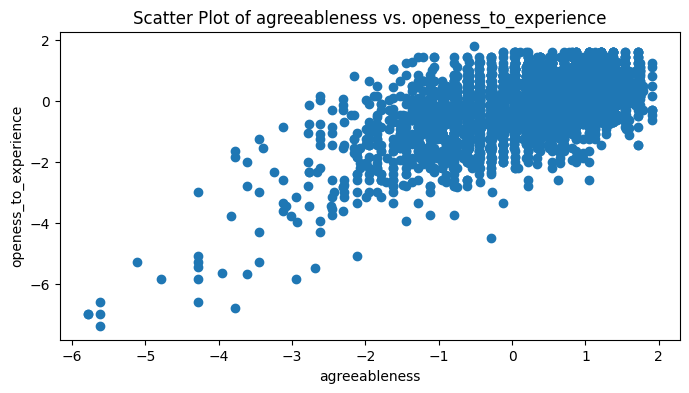

In [106]:
import scipy.stats

def check_correlation(col1, col2):
    correlation, pvalue = scipy.stats.pearsonr(df[col1], df[col2])
    return correlation, pvalue

# Loop through each pair of numerical columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        correlation, pvalue = check_correlation(col1, col2)
        if abs(correlation) > 0.5:
            # Show the plot if the correlation is strong
            plt.figure(figsize=(8, 4))
            plt.scatter(df[col1], df[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f"Scatter Plot of {col1} vs. {col2}")
            plt.show()

<b>Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc</b>

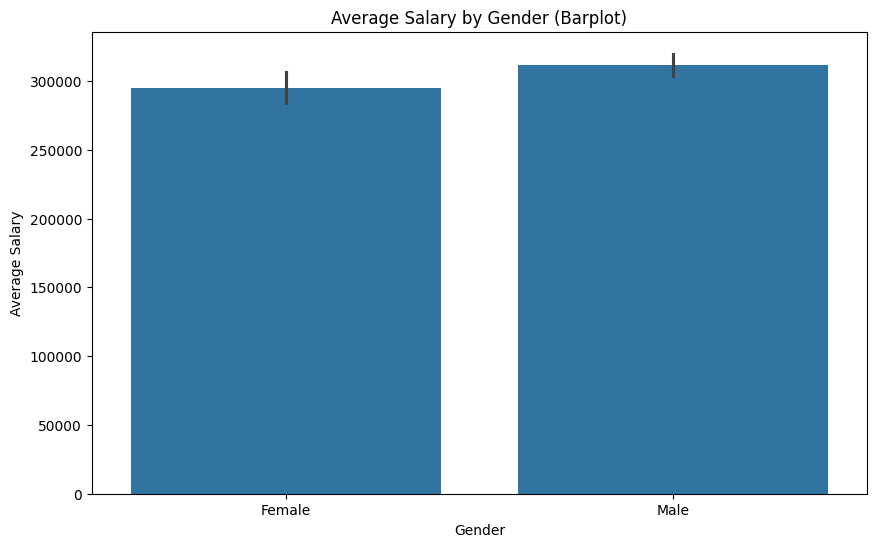

In [107]:
#Average Salary by Gender

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Salary', data=df, estimator=np.mean)  # You can change estimator to np.mean, np.median, etc. depending on your preference
plt.title('Average Salary by Gender (Barplot)')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

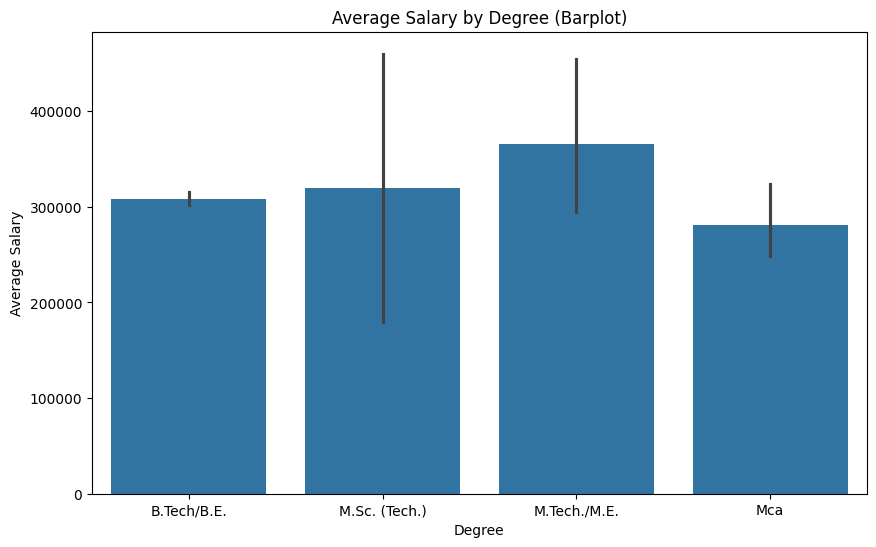

In [108]:
#Average Salary by Degree

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Salary', data=df, estimator=np.mean)  # You can change estimator to np.mean, np.median, etc. depending on your preference
plt.title('Average Salary by Degree (Barplot)')
plt.xlabel('Degree')
plt.ylabel('Average Salary')
plt.show()


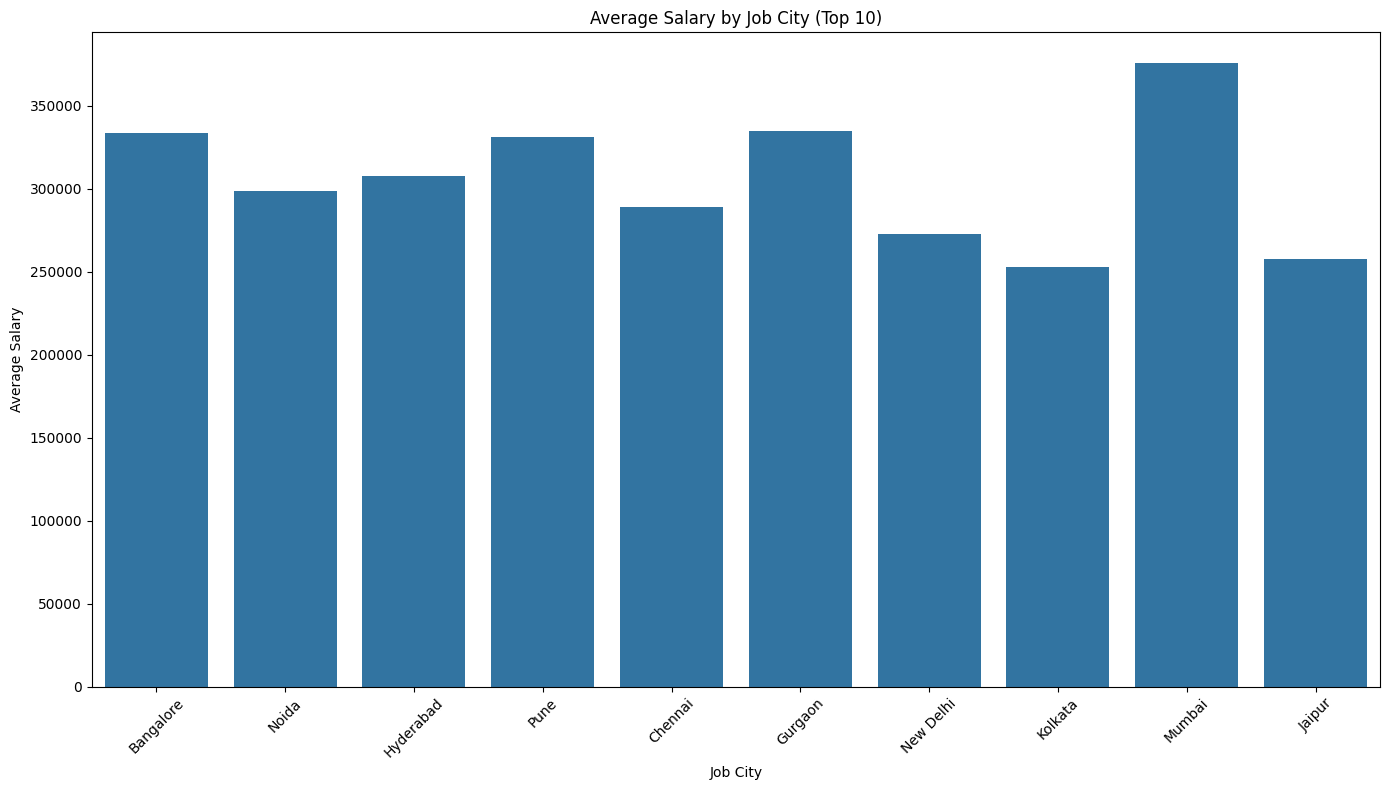

In [109]:
# Job City and Salary

# Find the top 10 most common job cities
top_10_jobcities = df['JobCity'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 job cities
df_top_10_jobcities = df[df['JobCity'].isin(top_10_jobcities)]

# Calculate the average salary for each job city
avg_salary_by_jobcity = df_top_10_jobcities.groupby('JobCity', observed=True)['Salary'].mean().reset_index()

# Sort the dataframe by average salary in descending order for better visualization
avg_salary_by_jobcity = avg_salary_by_jobcity.sort_values(by='Salary', ascending=False)

# Barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='JobCity', y='Salary', data=avg_salary_by_jobcity, order=top_10_jobcities)
plt.title('Average Salary by Job City (Top 10)')
plt.xlabel('Job City')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


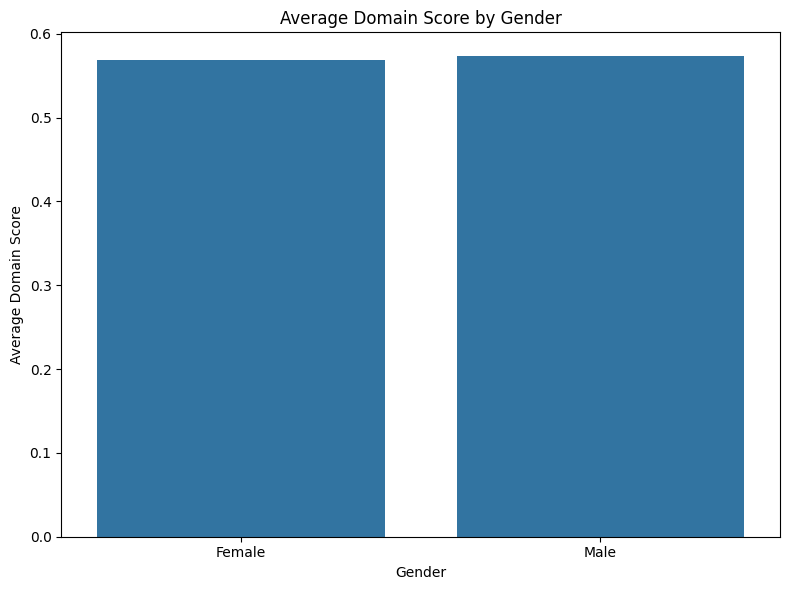

In [110]:
#Domain vs gender

# Calculate the average domain score for each gender
avg_domain_by_gender = df.groupby('Gender', observed=True)['Domain'].mean().reset_index()

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Domain', data=avg_domain_by_gender)
plt.title('Average Domain Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Domain Score')
plt.tight_layout()
plt.show()

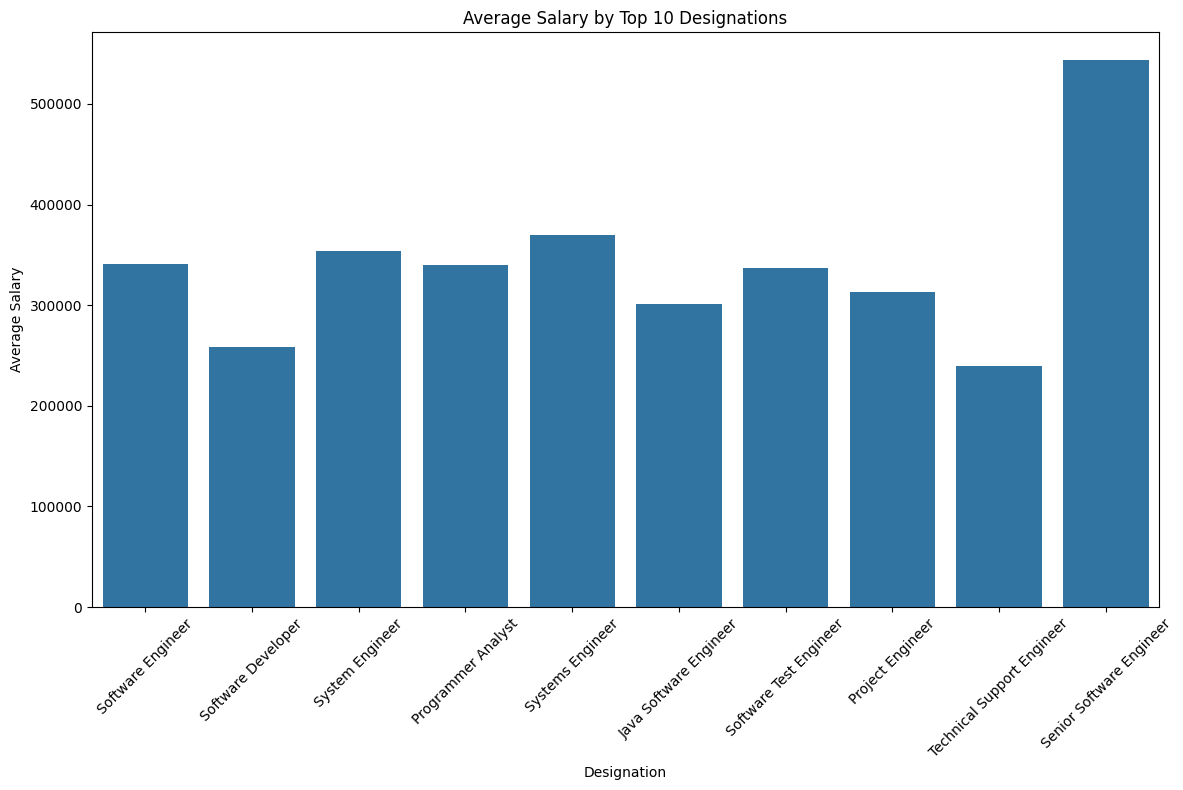

In [111]:
#Average Salary by Top 10 Designations

# Find the top 10 most common job designations
top_10_designations = df['Designation'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 job designations
df_top_10_designations = df[df['Designation'].isin(top_10_designations)]

# Calculate the average salary for each job designation
avg_salary_by_designation = df_top_10_designations.groupby('Designation', observed=True)['Salary'].mean().reset_index()

# Sort the dataframe by average salary in descending order for better visualization
avg_salary_by_designation = avg_salary_by_designation.sort_values(by='Salary', ascending=False)

# Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Designation', y='Salary', data=avg_salary_by_designation, order=top_10_designations)
plt.title('Average Salary by Top 10 Designations')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

•	Identify relationships between categorical and categorical columns using stacked bar plots.

In [112]:
df.columns


Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

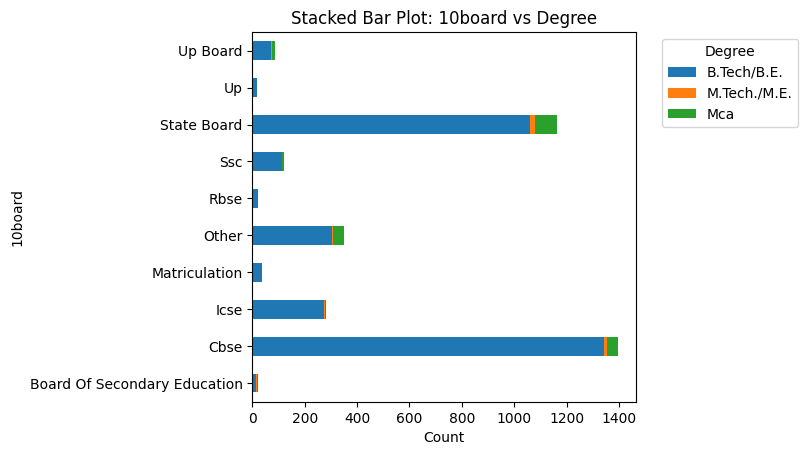

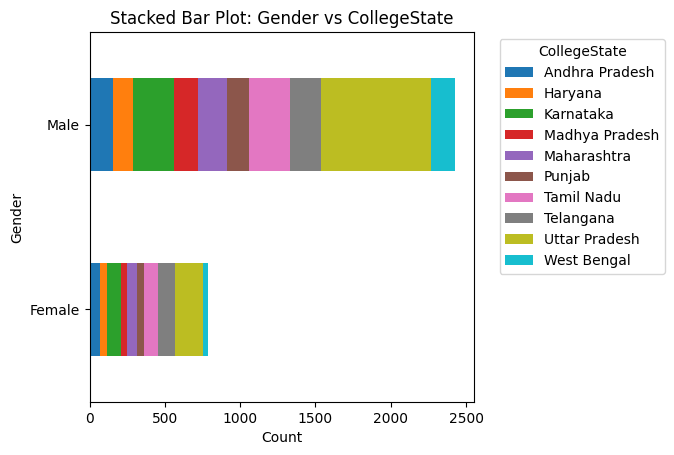

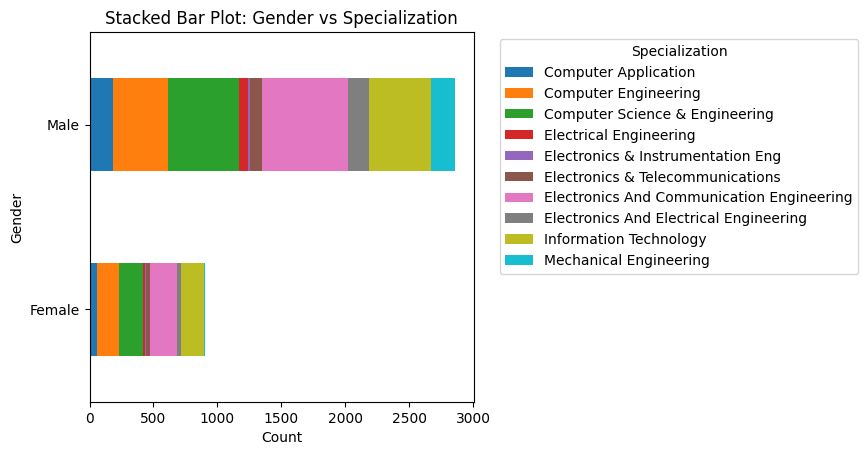

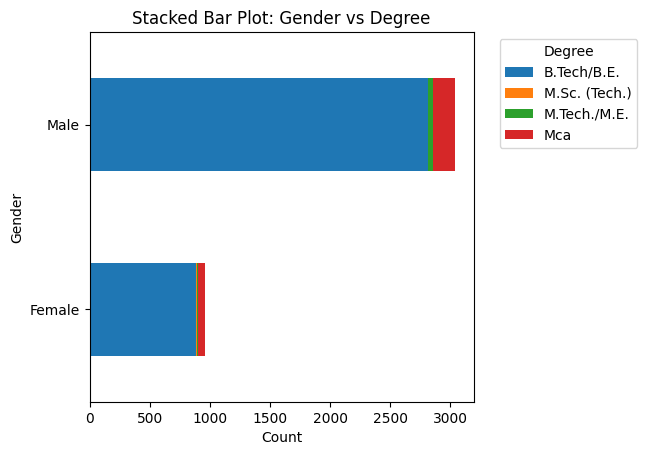

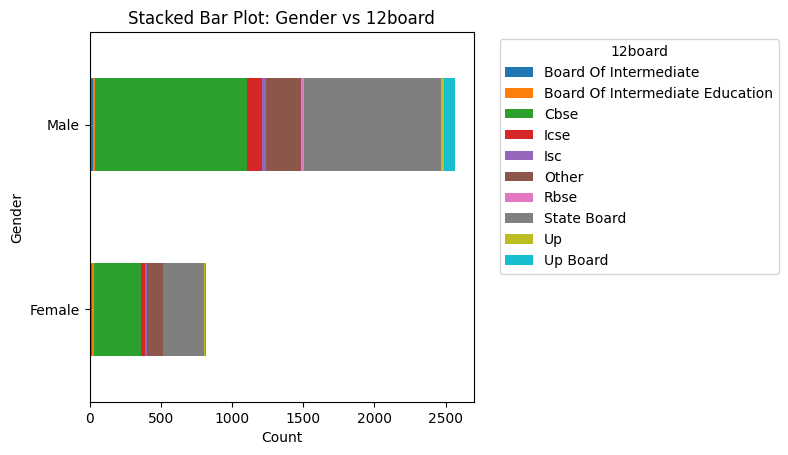

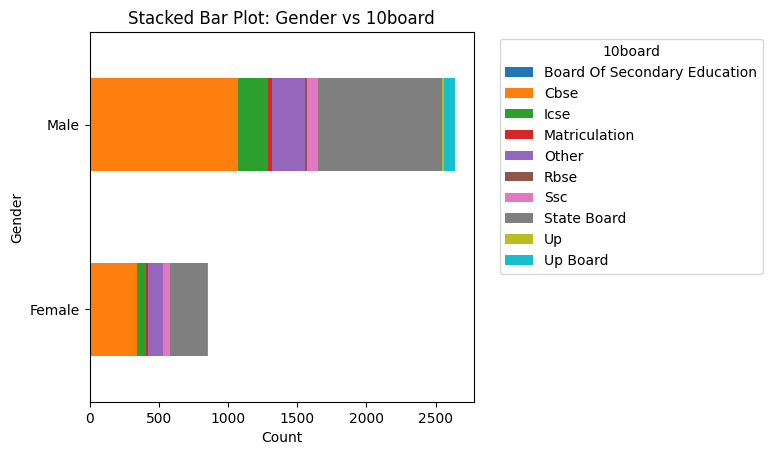

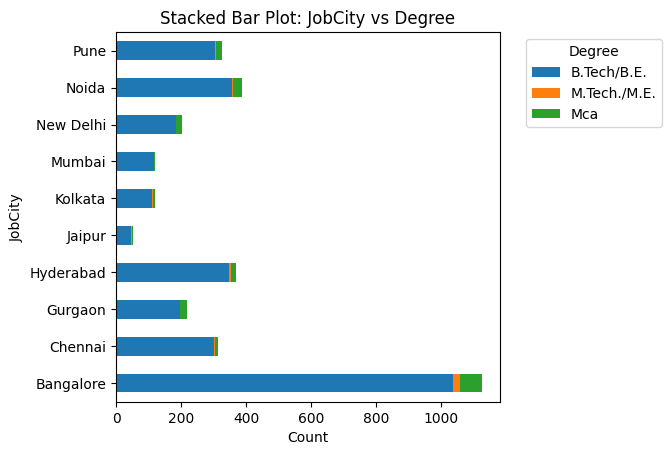

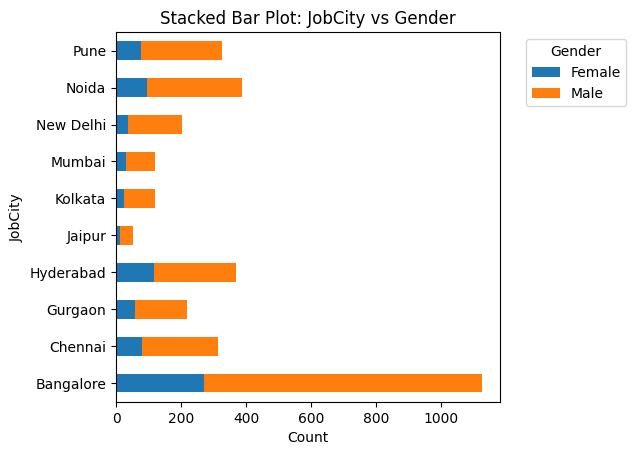

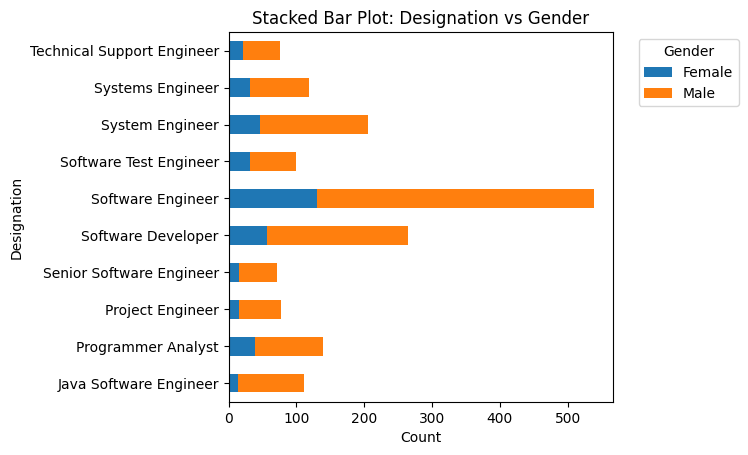

In [113]:
import matplotlib.pyplot as plt

# Specify the categorical column pairs
categorical_pairs = [
    
    ('10board', 'Degree'),
    ('Gender', 'CollegeState'),
    ('Gender', 'Specialization'),
    ('Gender', 'Degree'),
    ('Gender', '12board'),
    ('Gender', '10board'),
    ('JobCity', 'Degree'),
    ('JobCity', 'Gender'),
    ('Designation', 'Gender')
]

# Set a common figure size for all plots
plt.figure(figsize=(10, 6))

# Iterate over each specified pair
for pair in categorical_pairs:
    col1, col2 = pair
    
    # Get the top 10 common values for each categorical column
    top_values_col1 = df[col1].value_counts().nlargest(10).index
    top_values_col2 = df[col2].value_counts().nlargest(10).index
    
    # Filter the DataFrame to include only rows with top 10 values for each column
    filtered_df = df[df[col1].isin(top_values_col1) & df[col2].isin(top_values_col2)]
    
    # Create a cross-tabulation of the two categorical columns
    cross_tab = pd.crosstab(filtered_df[col1], filtered_df[col2])
    
    # Plot the stacked horizontal bar plot
    cross_tab.plot(kind='barh', stacked=True)
    plt.title(f'Stacked Bar Plot: {col1} vs {col2}')
    plt.xlabel('Count')
    plt.ylabel(col1)
    plt.legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(-0.5, len(cross_tab)-0.5)  # Ensure start from 0
    plt.yticks(ticks=range(0, len(cross_tab)), labels=cross_tab.index)
    plt.subplots_adjust(left=0.2, right=0.8)  # Adjust left and right margins
    plt.show()


<h1>Research Questions</h1>

•	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [114]:
# Specified roles
specified_roles = ['programmer analyst', 'software engineer', 'Hardware Engineer','Associate Engineer','software developer', 'jr. software developer','programmer','java software engineer']

# Filter the DataFrame for Computer Science Engineering graduates in the specified roles
specified_df = df[df['Designation'].isin(specified_roles)]

# Calculate the minimum and maximum salaries among the filtered data
min_salary = specified_df['Salary'].min()
max_salary = specified_df['Salary'].max()

# Claimed salary range
claimed_lower_bound = 250000
claimed_upper_bound = 300000  # Assuming '3 lakhs' means 3,00,000

# Test if the claim is consistent with the data
if claimed_lower_bound <= min_salary and max_salary <= claimed_upper_bound:
    print("The claim is consistent with the data.")
else:
    print("The claim is NOT consistent with the data.")


The claim is NOT consistent with the data.


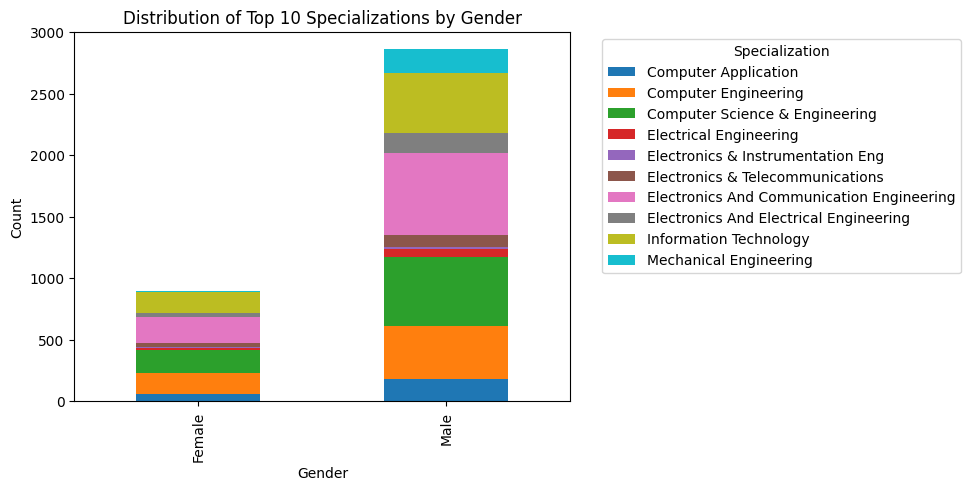

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset with 'Gender' and 'Specialization' columns

# Get the top 10 specializations for each gender
top_specializations = df['Specialization'].value_counts().nlargest(10).index
top_specializations_df = df[df['Specialization'].isin(top_specializations)]

# Create a contingency table for the top 10 specializations
contingency_table_top = pd.crosstab(top_specializations_df['Gender'], top_specializations_df['Specialization'])

# Plot the stacked bar plot for the top 10 specializations
ax = contingency_table_top.plot(kind='bar', stacked=True)
plt.title('Distribution of Top 10 Specializations by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Move the legend outside of the plot
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()